# Sentiment Analysis - Reddit

## Work Flow

**SET UP**

1. Set up notebook.
2. Identify flairs or search queries of interest (cannot use below function if you want to use additional parameters - i.e., time stamp).

**THREADS**

3. Use Function A to scrape thread titles for search queries of interest.
4. Use Function B to perform sentiment analysis on thread titles.
5. Use Function B-i to sort by positive, negative, and neutral posts.

**COMMENTS**

<strike>6. Use Function C to get URL, etc. for threads based on sentiment label. (Optional: Extract to .CSV)
    
<strike>7. Go through the titles manually to see which ones peak your interest.

8. Use Function D to get comments from thread URL. 
9. Use Function B to perform sentiment analysis on comments.

Suggestions - flair (discussion, official post), word cloud, competitor analysis

## Set Up

**Instructions**
1. Log on to Reddit.
2. Visit https://reddit.com/prefs/apps (or https://old.reddit.com/prefs/apps/).
3. Create a personal script. 
4. Replace client id, client_secret below.

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import praw

user_agent = "PlsNoBlockMeReddit 1.0 by /u/lmluk"
reddit = praw.Reddit(
    client_id="I7UtuKPLzIkEATK-e42-cg",
    client_secret="9K6fKvSbvO6o3fW0rNzxGpnHFnTeWw",
    user_agent=user_agent
)

In [3]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kirbypark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Functions

### A. Getting Thread Titles from Search Queries

Only set up for search keywords & flairs.

In [10]:
def get_thread_titles(subreddit, flair):
    data = set()
    for submission in reddit.subreddit(subreddit).search(flair):
        data.add(submission.title)
    return data

### B. Sentiment Analysis

In [46]:
def sentiment_analysis(set):
    
    sia = SIA()
    results = []

    for line in set:
        pol_score = sia.polarity_scores(line) #auto sentiment classification that returns dict
        pol_score['headline'] = line #store current line as a headline key in dict
        results.append(pol_score) #append to results

    #creating a dataframe
    df = pd.DataFrame.from_records(results)
    
    #new column label
    df['label'] = 0 
    df.loc[df['compound'] > 0.2, 'label' ] = 1 #positive
    df.loc[df['compound'] < -0.2, 'label'] = -1 #negative

    df2 = df[['headline', 'label']]
    
    return df2

**B-i. Check Headlines by Label**

In [88]:
def check_headline(df, value):
    
    if value == 1:
        print('Positive headlines:\n')
        pprint(list(df[df['label'] == 1].headline), width=200)
        
    elif value == -1:
        print('Negative headlines:\n')
        pprint(list(df[df['label'] == -1].headline), width=200)
        
    elif value == 0:
        print('Neutral headlines:\n')
        pprint(list(df[df['label'] == 0].headline), width=200)
        
    return

### C. Get Info for Threads
note: sorry...

In [63]:
def get_thread_info(subreddit, flair):
    
    final_data = []
    header_list = ['id', 'title', 'author', 'url', 'num_upvotes', 'upvote_ratio', 'num_comments', 'date']

    for submission in reddit.subreddit(subreddit).search(flair):
        val = [submission.id, submission.title, submission.author, submission.url, submission.score, submission.upvote_ratio, submission.num_comments, submission.created_utc] 
        final_data.add(val) 

    return final_data

### D. Get Comments from Thread URL

**References**
* https://praw.readthedocs.io/en/latest/code_overview/models/comment.html

In [67]:
def get_comments(url):
    submission = reddit.submission(url=url)
    
    final_comments = set()
    submission.comments.replace_more(limit=0)
    
    for comment in submission.comments:
        final_comments.add(comment.body)
    
    return final_comments

## Genshin Impact

In [41]:
data = get_thread_titles("Genshin_Impact", "flair:Discussion")

In [49]:
df = sentiment_analysis(data)

In [53]:
#check number of positive, negative, neutral headlines

df.label.value_counts()

 0    42
 1    35
-1    23
Name: label, dtype: int64

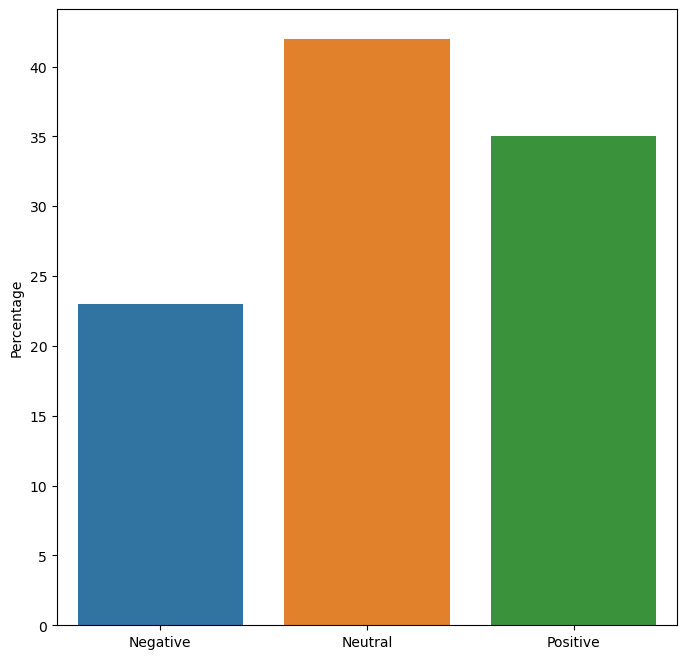

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

In [89]:
check_headline(df, -1)

Negative headlines:

['A warning to all future Eula havers',
 'Most annoying genre of genshin player has to be the ones who make quitting genshin their entire personality',
 "Am I one of a few that grinds a full set of artifacts for each character and doesn't just share them between multiple characters?",
 'Whats the most rage inducing challenge you have encountered ?',
 'what is a character that people think is absolutely useless, but you still use anyways?',
 'Which Genshin character do you love, but would hate as a person?',
 'Excuse the foul language but why the fuck do the cooldowns not reset when retrying abyss???',
 'Ever notice there are no more playable adveturers in other regions??',
 "What's so horrible about including TCG in an event?",
 'What is y’all’s LEAST favorite thing to do in Genshin',
 'there should be more badass outfits for female characters that aren\'t necessarily "sexy"',
 "Why Klee and Eula's Revenue is so low: An analysis",
 'what is the worst genshin headca

In [90]:
check_headline(df, 1)

Positive headlines:

["How much of sumeru did y'all enjoy? be honest about it",
 'New Spiral Abyss Appreciation Post',
 'Friendly reminder to those farming primo gems for Fontaine, TO ALSO Farm Exp Books, no one is going to like having to farm those DURING THE UPDATE.',
 'I Want Fontaine To Be More Like Inazuma In Terms of Puzzles.',
 "At this point, IMO, Genshin is a prime target for trolls and streamers mainly because we're big and will put up a good fight, not because we're an anime game, a gacha game, nor a game with a bad "
 'fanbase.',
 'who else loved the sumeru desert?',
 'Rat tails are giving me trust issues',
 'Why do vision holder not put the vision in their body',
 'Do you like Paimon?',
 'As 3.0 update comes to an end who do you think got the biggest buff thanks to dendro',
 'Who has the least annoying idle voice lines?',
 'Who’s the character you’re most comfortable when using?',
 'Genshin Impact is very popular in Russia',
 'After completing 3.8, it seems the 2.8 Golden 

In [68]:
comments = get_comments("https://www.reddit.com/r/Genshin_Impact/comments/14zgvjg/why_klee_and_eulas_revenue_is_so_low_an_analysis/")

In [69]:
dff = sentiment_analysis(comments)

In [71]:
#check number of positive, negative, neutral headlines

dff.label.value_counts()

 1    92
 0    57
-1    54
Name: label, dtype: int64

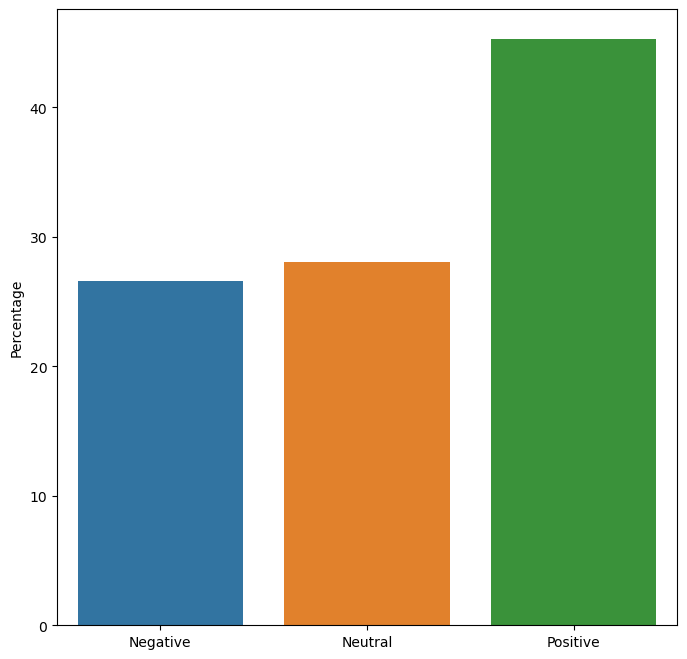

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = dff.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

In [73]:
dff.to_csv(r'/Users/kirbypark/Desktop/JupyterNotebook/genshin_14zgvjg.csv', index=False)

In [78]:
data2 = get_thread_titles("Genshin_Impact", "flair_name:\":hoyo1::hoyo2: Official Post\"")

In [80]:
df2 = sentiment_analysis(data2)

In [82]:
#check number of positive, negative, neutral headlines

df2.label.value_counts()

 1    48
 0    47
-1     5
Name: label, dtype: int64

In [91]:
check_headline(df2, 1)

Positive headlines:

['"Secret Summer Paradise" Version 3.8 Update Maintenance Preview',
 'Happy Birthday, Paimon!',
 'Version 3.8 Special Program Redemption Codes',
 '"Secret Summer Paradise" Version 3.8 Events Preview - Phase II',
 "Paimon's Recommendation: The Hardest Custom Domains from Divine Ingenuity",
 'Happy Birthday, Dehya!',
 'Happy Birthday, Hu Tao!',
 'Happy Birthday, Shikanoin Heizou!',
 'Happy Birthday, Arataki Itto!',
 'Happy Birthday, Yun Jin!',
 "Fan Art Collection: Yae Miko's surprise delivery",
 'Happy Birthday, Venti!',
 'Happy Birthday, Yae Miko!',
 'Happy Birthday, Yanfei!',
 'Happy Birthday, Collei!',
 'Travelers, the official Genshin Impact Genius Invokation TCG Duel Event has begun! Come check out the exciting content~',
 'Dear Travelers, the event wishes "The Moongrass\' Enlightenment," "Twirling Lotus," and "Epitome Invocation" will be available on April 12!',
 'Happy Birthday, Klee!',
 'Happy Birthday, Kuki Shinobu!',
 'Happy Birthday, Lisa!',
 'Happy Birth

In [92]:
comments2 = get_comments("https://www.reddit.com/r/Genshin_Impact/comments/14p8g2w/overture_teaser_the_final_feast_genshin_impact/")

In [96]:
dff2 = sentiment_analysis(comments2)

In [97]:
dff2.label.value_counts()

 1    62
 0    42
-1    23
Name: label, dtype: int64

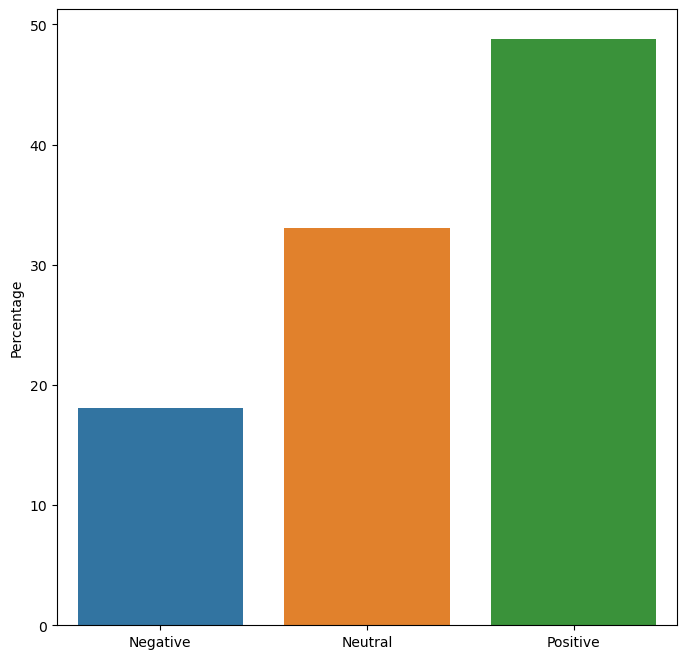

In [98]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = dff2.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

In [103]:
#for nexon game bc im curious

c = get_comments("https://www.reddit.com/r/Maplestory/comments/14y59pu/v243_savior_shangrila_kaling_update_preview/")

In [104]:
d = sentiment_analysis(c)

In [105]:
d.label.value_counts()

 0    9
 1    6
-1    4
Name: label, dtype: int64

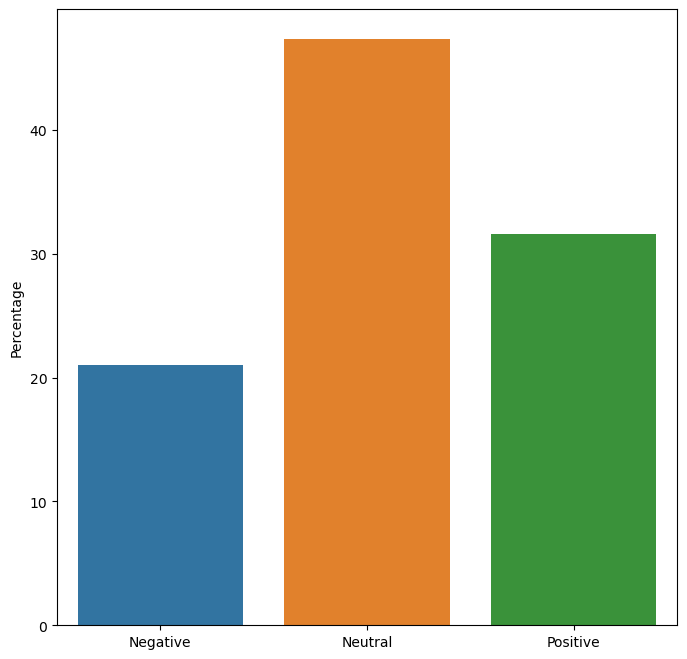

In [106]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = d.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

In [108]:
check_headline(d, 1)

Positive headlines:

['So this event is starting next week? To help with current hyper burn char? Or do we get another hyper burn for this update? Also I there gonna be another burn for 260 later? It seems like a lot of '
 'rewards to give our current hyper burn.',
 '1200 nodes tucked away in 3 pixels lol',
 'Is this best event ever territory? These rewards are crazy.',
 'Had been waiting for a burning for temp CRA but a fake arcane would be nice to start a new character with lol',
 'what is that yellow colored growth potion?',
 "Oh when's this coming? I thought it was gunna be like July 28 for some reason, is this next week?"]


In [109]:
check_headline(dff2, 1)

Positive headlines:

["Wow, some of the designs have the sleeves attached to the body. Fontaine's technology truly is advanced.",
 'PLEASE let this style of music persist throughout Fontaine. Can you imagine exploring the overworld to this jam? Honestly the best part of the whole trailer for me (after arle ofc)',
 'Fontaine character desgins really showcasing Hoyoverse’s Honkai Impact 3rd aesthetics into the limelight. Not a bad thing, I’m all for that.',
 'Neuvillette 100% has the expression of a man done with Focalors’ shit. And I’m so excited to see the dynamic between Arlecchino, Lyney, and Lynette! Wow!',
 'Hoping for clorinde, arlecchino, neuvillete and focalors',
 "AYOOOOO!! I'M WET! \n\nChief Justice Nuevillete, Furina (Focalor), and Captain R I'll be pulling for. Arlecchino maybe.",
 'OH MY GOD',
 "I'm ready to wait for Arlecchino",
 "I can't wait for Arlecchino to be playable. Fellow harbinger collectors let's hope hoyo doesn't kill her off >!like Signora.!<",
 'Potentially a